# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [83]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
plt.rcParams["patch.force_edgecolor"] = True

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [21]:
hospital_read_df.head(100)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


In [20]:
hospital_read_df[hospital_read_df['Excess Readmission Ratio']>1.6]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/michalczapski/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


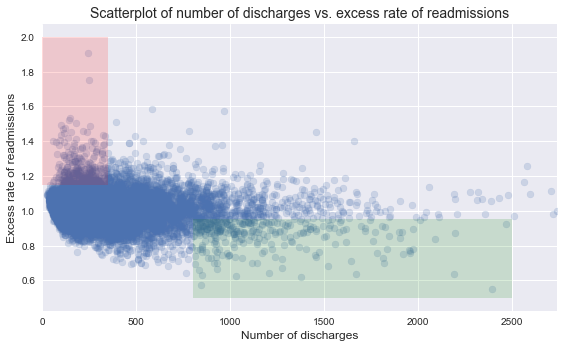

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A.
- The analysis is not complete. More quantiative, statistical analysis needs to be performed i.e. linear regression, correlation analysis etc. 
<br>
- Number of points of small number of discharges seems significantly bigger than the number of big number of discharges. Residual should be performed to see if there is variance difference between those two regions. 
<br> 
- descriptive statistics in the part C. for two samples are given without any hypothesis testing. 
<br>
- The results are not conclusive about correlation, it is only based on visual inspection. 
- There was no hypothesis testing about facility conditions.
- There might be additional factors contributing to excess readmission rate that haven't been analysed. 

## B.

First, let's analyze quantitatively the linear regression, and see if there is linear dependence between excess readmission rate and number of discharges. 
<br> Let's set up hypotheses for testing:
- Ho: the slope is equal zero.
- Ha: the slope is not equal zero. 
- Signifcance level = 10%


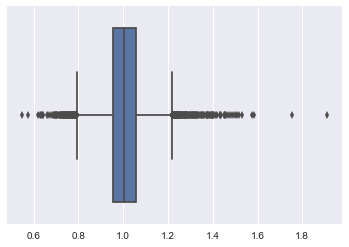

In [85]:
sns.boxplot(y);

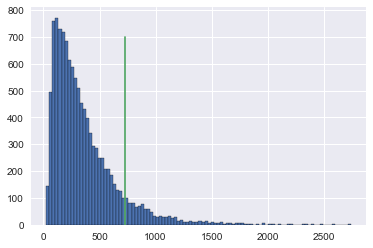

In [89]:
plt.hist(x,bins = 100);
plt.plot([726,726],[0,700]);

In [87]:
np.percentile(x,[90])

array([ 726.])

In [75]:
np.mean(x)

364.31372890203585

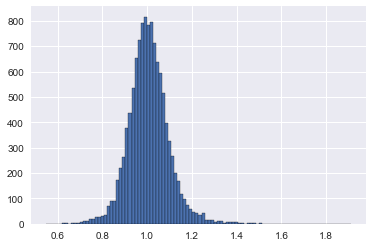

In [90]:
plt.hist(y,bins = 100);

In [72]:
def edcf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1)/len(x)
    return x,y 
xe,ye=edcf(y)
u=np.mean(y)
s=np.std(y)
normaldata = np.random.normal(u,s,100000)
x_theor,y_theor = edcf(normaldata)
np.percentile(y,[5,85])

array([ 0.871565,  1.0895  ])

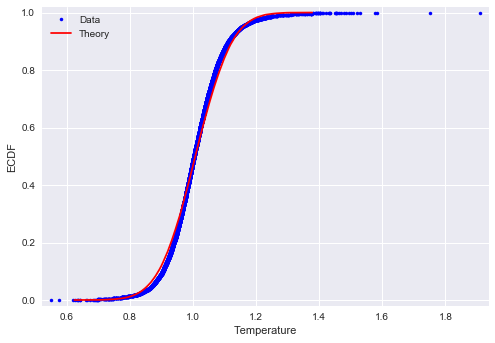

In [62]:
plt.plot(xe,ye, marker = '.',linestyle = 'none',color = 'blue');
plt.plot(x_theor,y_theor,color = 'red');
plt.margins(0.02);
plt.xlabel('Temperature');
plt.ylabel("ECDF");
plt.legend(['Data','Theory'])

In [6]:
# Calculating linear regression statistics
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
print("slope = {}, intercept = {}".format(slope,intercept))
print("P-value is equal ",pvalue)
print("R2 is equal to ", rvalue**2)
print("Correlation coefficient is equal to ",rvalue)

slope = -2.8565052943822634e-05, intercept = 1.017947557954422
P-value is equal  1.50227564266e-23
R2 is equal  0.00866678010336
Correlation coefficient is equal  -0.0930955428759


In [34]:
#excluding two outliers 1.9095 and 1.7521
xo=x[y<1.7]
yo=y[y<1.7]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(xo, yo)
print("slope = {}, intercept = {}".format(slope,intercept))
print("P-value is equal ",pvalue)
print("R2 is equal to ", rvalue**2)
print("Correlation coefficient is equal to ",rvalue)

slope = -2.8374130037812752e-05, intercept = 1.0177353186043865
P-value is equal  1.4588549398e-23
R2 is equal to  0.00867329417874
Correlation coefficient is equal to  -0.0931305222725


In [69]:
# calculating in the confidence range 0.7464115,  1.241726 (99% of data)
xo=x[(0.7464115<y) & (y<1.241726)]
yo=y[(0.7464115<y) & (y<1.241726)]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(xo, yo)
print("slope = {}, intercept = {}".format(slope,intercept))
print("P-value is equal ",pvalue)
print("R2 is equal to ", rvalue**2)
print("Correlation coefficient is equal to ",rvalue)

slope = -1.966906498499037e-05, intercept = 1.0113110545013255
P-value is equal  1.17185185608e-14
R2 is equal to  0.00527744017603
Correlation coefficient is equal to  -0.0726459921539


In [71]:
# calculating in the confidence range 0.9278,  1.0852 (68% of data)
xo=x[(0.9278<y) & (y<1.0852)]
yo=y[(0.9278<y) & (y<1.0852)]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(xo, yo)
print("slope = {}, intercept = {}".format(slope,intercept))
print("P-value is equal ",pvalue)
print("R2 is equal to ", rvalue**2)
print("Correlation coefficient is equal to ",rvalue)

slope = -6.951966534027403e-07, intercept = 1.004780401548617
P-value is equal  0.681251441754
R2 is equal to  2.16070549336e-05
Correlation coefficient is equal to  -0.00464833894349


In [73]:
# calculating in the confidence range 0.871565,  1.0895 (90% of data)
xo=x[(0.871565<y) & (y<1.0895)]
yo=y[(0.871565<y) & (y<1.0895)]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(xo, yo)
print("slope = {}, intercept = {}".format(slope,intercept))
print("P-value is equal ",pvalue)
print("R2 is equal to ", rvalue**2)
print("Correlation coefficient is equal to ",rvalue)

slope = -1.2652641314166953e-05, intercept = 0.9961439760331566
P-value is equal  7.52286024864e-11
R2 is equal to  0.00459995994021
Correlation coefficient is equal to  -0.067823004506


In [97]:
# calculating in the confidence range 0.871565,  1.0895 (90% of y data) and below 721 (90% of x data)
xo=x[(0.871565<y) & (y<1.0895) &(x>1000)]
yo=y[(0.871565<y) & (y<1.0895)& (x>1000)]
slope, intercept, rvalue, pvalue, stderr = stats.linregress(xo, yo)
print("slope = {}, intercept = {}".format(slope,intercept))
print("P-value is equal ",pvalue)
print("R2 is equal to ", rvalue**2)
print("Correlation coefficient is equal to ",rvalue)

slope = -4.0205126732779383e-07, intercept = 0.9850700854287016
P-value is equal  0.968268319795
R2 is equal to  5.0316773491e-06
Correlation coefficient is equal to  -0.00224314006453


We can reject null hypothesis and accept alternate hypothesis, that slope is not equal zero. 
<br> There is negative correlation proved by the correlation coefficient of -0.09.
<br> R2 value is equal 0.009, meaning that only 0.9% of the data can be explained by the linear regression. 
<p> Let's perform boostrap testing of the slope.

In [7]:
#bootstrap analysis
size = 100000
x=np.array(x)
y=np.array(y)
inds = np.arange(len(x))
bs_slopes = np.empty(size)
bs_intercepts = np.empty(size)
for i in range(size):
    bs_inds = np.random.choice(inds,len(inds))
    bs_slope,bs_intercept=np.polyfit(x[bs_inds],y[bs_inds],1)
    bs_slopes[i] = bs_slope
    bs_intercepts[i] = bs_intercept

In [8]:
CI_slope = np.percentile(bs_slopes,[5,95])
print("Confidence interval is equal ",CI_slope)

Confidence interval is equal  [ -3.43628625e-05  -2.28123108e-05]


The confidence interval doesn't contain zero, so the slope is always not equal to zero.

In [9]:
x_ = np.array([0,3000])
y_ = slope*x_ + intercept

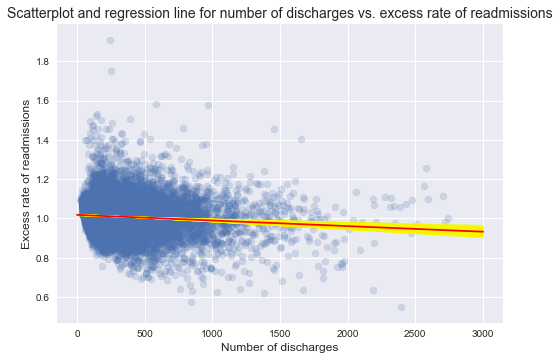

In [10]:
sns.set()
plt.scatter(x, y,alpha=0.2)
for i in range(10000):
    _ = plt.plot(x_, bs_slopes[i]*x_ + bs_intercepts[i],
                 linewidth=0.5, alpha=0.2, color='yellow')

plt.plot(x_,y_,color = 'red')
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot and regression line for number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

The scatter plot on it's own is sometimes difficult to read, therefore plotting a linear regression line can help to spot a trend. Additionally, confidence intervals plotted around the line can better picture how significant is the result.
<p> The scatter plot has a lot of points around lower values of independent variable and fewer points at the end of the horizontal axis.
<br> Let's plot residual plot to see if there is no difference in variance between those to regions.

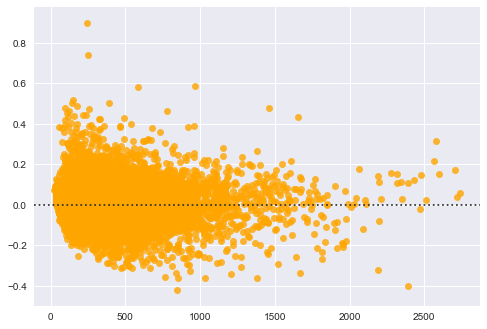

In [11]:
sns.residplot(np.array(x), np.array(y),color = 'orange');

Indeed, there is some heteroscedasticity observed, with greater variability at the lower values of discharge rate. One of the reasons could be a hidden variable, is not analysed. 
<p> Finally let's analyse correlation using bootstraping method:
- Ho: Correlation coefficient is equal zero.
- Ha: Correlation coefficient is not equal zero.
- Signifcance level = 10%

In [12]:
#correlation bootstraping
size =10000
perm_replicates =np.empty(size)
for i in range(size):
    excess_permuted = np.random.permutation(x)

    # Compute Pearson correlation
    perm_replicates[i] = np.corrcoef(excess_permuted, y)[0,1]

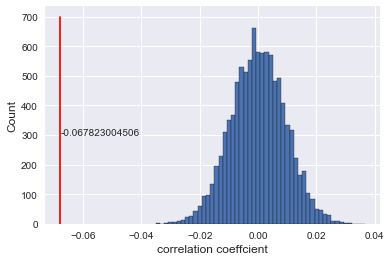

In [92]:
plt.hist(perm_replicates,bins=50);
plt.plot([rvalue,rvalue],[0,700],color = 'red');
plt.xlabel('correlation coeffcient', fontsize=12);
plt.ylabel('Count', fontsize=12);
plt.annotate(xy=[rvalue,300],s=rvalue);

In [14]:
observed_corr=np.corrcoef(x,y)[0,1]
p_value = np.sum(perm_replicates <= observed_corr)/len(perm_replicates)
CI = np.percentile(perm_replicates,[5,95])
print("P-value is equal to ",p_value)
print("Confidence interval is equal to ",CI)

P-value is equal to  0.0
Confidence interval is equal to  [-0.01516794  0.01559303]


One can see that the p-value is equal zero. We can reject the null hypothesis an accept that correlation is not equal zero. 

#### Practical significance vs. statistical significance
The above results are statistically significant, meaning that p-value is lower than the siginficance level. 
<br> However, one needs to understand if the result is practially significant - i.e. if the magnitude of significant difference is worth an effort to implement a new solution. We saw that only 0.9% of the data can be explained by the linear regression. The slope's confidence interval is very narrow range of -3.43770521e-05 and -2.28112839e-05, and additionally, heteroscedasticity was detected suggesting that there might be other factors that should be considered in the regression analysis. 
<br> All the above must be reconsidered before implementing the new policies that will cost money and effort, as they might not visibly improve excess readmission rate. 